<a href="https://colab.research.google.com/github/Jubin5/Census/blob/main/DSML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Title of ML project: INCOME LEVEL CLASSIFICATION PREDICTIONS**

**Name:** JUBIN K. BABU.

**Organization:** Entri Elevate

**Date:** [Evaluation Date]

#1.Overview of Problem Statement


The ML project aims to predict whether an individual’s income is above or below $50K using the Census Income Dataset from UCI. The dataset includes demographic and work-related features like age, education, occupation, work hours, and capital gain/loss. The workflow involves data preprocessing, exploratory data analysis (EDA), model training using classification algorithms (Logistic Regression, Decision Trees, Random Forest, etc.), and performance evaluation. The best-performing model will be optimized and deployed for practical use. This project provides insights into income disparity factors and can be useful in HR analytics, financial planning, and policy-making

# 2.Objective


Develop a machine learning model to predict whether an individual earns more than $50K per year based on demographic and employment-related attributes from the UCI Census Income dataset. This model can be useful for socioeconomic analysis, government policy planning, and targeted financial services.

#3.Data Description

[UCI Census Income dataset (also known as "Adult" dataset)]

Features: [age,workclass,fnlwgt,education,education-num,marital-status, occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week, native-country,income]

**Importing Necesscary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_curve, auc,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


#4.Data Collection

In [ ]:
#  Defining column names based on dataset
columns = ["age", "workclass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex",
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Load the .data and .test files into DataFrames
df_train = pd.read_csv("/content/adult.data", names=columns, skipinitialspace=True)
df_test = pd.read_csv("/content/adult.test", names=columns, skipinitialspace=True, skiprows=1)

# Display first 6 rows
df_train.head()
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


**CONVERTING TO DATAFRAME**

In [ ]:
# Concatenate the training and testing datasets
df = pd.concat([df_train, df_test], axis=0)

# Reset the index of the combined DataFrame
df = df.reset_index(drop=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.duplicated().sum()

29

In [ ]:
df.drop_duplicates(inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<50K


In [ ]:
df["native-country"].value_counts()

,count
native-country,
United-States,43810
Mexico,947
?,856
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [ ]:
df["income"].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
df["income"].value_counts()

,count
income,
<=50K,24698
<=50K.,12430
>50K,7839
>50K.,3846


In [ ]:
# Replace income values
df["income"] = df["income"].replace({"<=50K.": "<50K", "<=50K": "<50K",">50K.": ">50K"})
df["income"].value_counts()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<50K


In [ ]:
df['native-country'] = df['native-country'].replace("?", np.nan)


In [ ]:
df["native-country"].value_counts()

,count
native-country,
United-States,43810
Mexico,947
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


In [ ]:
print(df['native-country'].isnull().sum())


856


In [ ]:
most_frequent_country = df['native-country'].mode()[0]
df['native-country'] = df['native-country'].fillna(most_frequent_country)


In [ ]:
print(df['native-country'].isnull().sum())


0


In the above code we replaced the "?" in the native country column to nan value and then replaced with its mode value and then again we checked for the null values


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,1079.708705,87.554299,40.425051
std,13.709005,1.056062e+05,2.570257,7454.185982,403.118605,12.390954
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Checking the skewness**

In [ ]:
df.select_dtypes(include="number").skew()

,0
age,0.556775
fnlwgt,1.439534
education-num,-0.315007
capital-gain,11.891093
capital-loss,4.568263
hours-per-week,0.239643


Here we can see that the most outliers are  present in the columns "capital-loss" and capital-gain",we are mainly focussing to build an ML model of classification so in that case it is not mandatory for us to remove this outlier otherwise it will give negative result with low accuracy.


**Capping Outliers using IQR method**

In [ ]:
#Creating a user-defined function for capping the outliers
import numpy as np
def cap_outliers(df, columns):
    df_capped = df.copy()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
    return df_capped



In [ ]:
numeric_cols = ["capital-gain", "capital-loss", "hours-per-week", "age", "fnlwgt", "education-num"]
df_capped = cap_outliers(df, numeric_cols)
df_capped

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<50K
48838,64.0,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<50K
48839,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<50K
48840,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,0.0,40.0,United-States,<50K


In [ ]:
df_capped.select_dtypes(include="number").skew()

,0
age,0.515425
fnlwgt,0.555153
education-num,-0.035090
capital-gain,0.000000
capital-loss,0.000000
hours-per-week,0.439390


**Encoding**

In [ ]:

le = LabelEncoder()
df_capped['income'] = le.fit_transform(df_capped['income'])



**Data Balancing**

In [ ]:
# Step 1: Separate the features (X) and target (y)
from imblearn.over_sampling import SMOTE
X = df_capped.drop('income', axis=1)
y = df_capped['income']  #
X = pd.get_dummies(X)

# Step 2: Apply SMOTE first to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Convert the resampled data back to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['income'])

# Step 4: Combine the resampled features and target back into a single DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Step 5: Check the new class distribution to ensure balance
df_resampled['income'].value_counts()

df_resampled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,39.000000,77516.000000,13.000000,0.0,0.0,40.000000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
1,50.000000,83311.000000,13.000000,0.0,0.0,32.500000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
2,38.000000,215646.000000,9.000000,0.0,0.0,40.000000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
3,53.000000,234721.000000,7.000000,0.0,0.0,40.000000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
4,28.000000,338409.000000,13.000000,0.0,0.0,40.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74251,39.853817,233837.366541,11.097455,0.0,0.0,45.243638,False,True,True,False,...,False,False,False,False,False,False,True,False,False,1
74252,56.655754,314151.623016,14.032738,0.0,0.0,51.639385,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
74253,42.687709,46382.877088,13.421927,0.0,0.0,44.093019,False,True,False,False,...,False,False,False,False,False,False,True,False,False,1
74254,30.101703,72887.000000,9.186444,0.0,0.0,40.000000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1


# 6. EXPLORATORY DATA ANALYSIS(EDA)

<ipython-input-25-075a2519cf37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_resampled['age'])


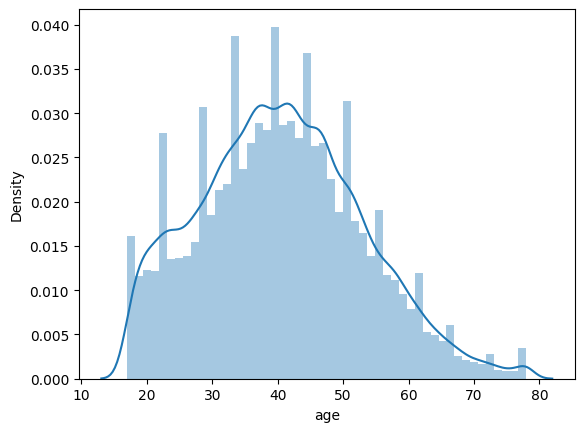

In [ ]:
sns.distplot(df_resampled['age'])
plt.show()


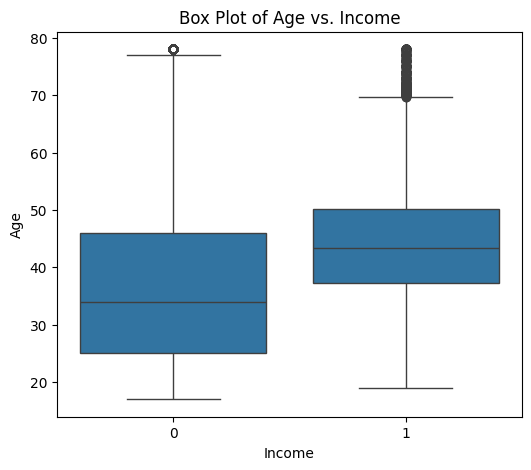

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='income', y='age', data=df_resampled)
plt.title('Box Plot of Age vs. Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


In [ ]:
print(df_resampled[['capital-gain', 'capital-loss']].isnull().sum())


capital-gain    0
capital-loss    0
dtype: int64


In [ ]:
df_resampled.fillna(0, inplace=True)

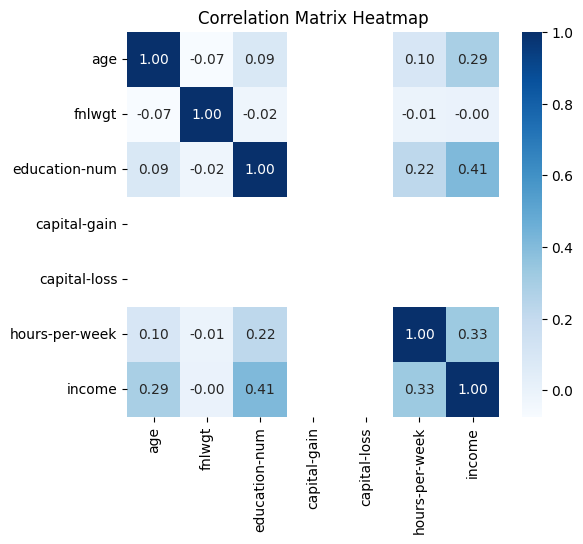

In [ ]:
import matplotlib.pyplot as plt
numeric_df = df_resampled.select_dtypes(include=np.number)

plt.figure(figsize=(6,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# 8. FEATURE SELECTION

In [ ]:

from sklearn.feature_selection import SelectKBest,chi2

selector = SelectKBest(chi2, k=10) # Select top 10 features
X_new = selector.fit_transform(X_resampled_df, y_resampled_df)

# Get the selected feature's names
selected_feature_indices = selector.get_support(indices=True)
selected_features = X_resampled_df.columns[selected_feature_indices]

print("Selected Features:", selected_features)

# Create a new DataFrame with selected features
X_selected = X_resampled_df[selected_features]



Selected Features: Index(['age', 'fnlwgt', 'education-num', 'hours-per-week',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Exec-managerial', 'occupation_Prof-specialty',
       'relationship_Husband', 'relationship_Own-child'],
      dtype='object')



#9. Split Data into Training and Testing Sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2)
y_test=y_test.values.ravel()

# 10. Build the ML Model:

In [ ]:
# Create a dictionary of models
models = {
    "Lr": LogisticRegression(),
    "Svm": SVC(),
    "Dt": DecisionTreeClassifier(),
    "Rf": RandomForestClassifier(),
    "Gb": GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Training Lr...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lr Accuracy: 0.8000942633988688
Training Svm...
Svm Accuracy: 0.5976299488284406
Training Dt...
Dt Accuracy: 0.8722730945327228
Training Rf...
Rf Accuracy: 0.8972528952329653
Training Gb...
Gb Accuracy: 0.8915970913008349


In [ ]:
#Train final model using best parameters
best_rf = RandomForestClassifier(random_state=42)
best_rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 88.7220576353353%


# 11. Model Evaluation

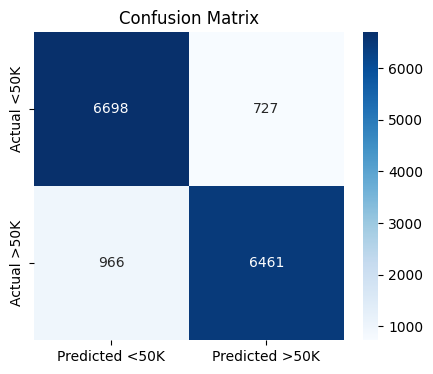

Accuracy: 0.8860086183678966
Precision: 0.8988592097941013
Recall: 0.8699340245051838
F1-Score: 0.8841601094765652


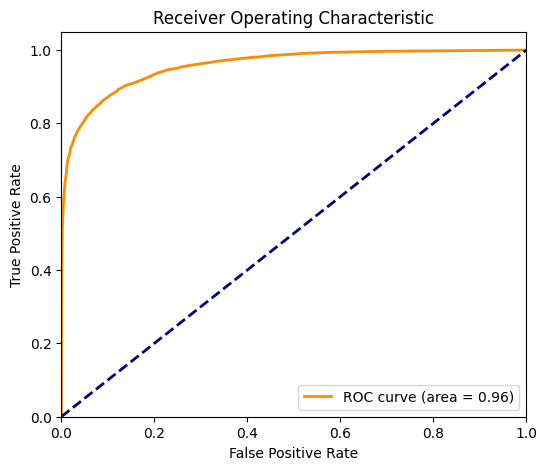

In [ ]:
# Predict probabilities for the positive class (income > 50K)
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
xticklabels=["Predicted <50K", "Predicted >50K"],
yticklabels=["Actual <50K", "Actual >50K"])
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Evaluation metrices DataFrame**

In [ ]:

accuracy = 0.8860086183678966
precision =0.8988592097941013
recall =0.8699340245051838
F1 = 0.8841601094765652


# Create a dictionary with the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy*100,precision*100,recall*100,F1]
}

# Create a Pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)
metrics_df


,Metric,Value
0,Accuracy,88.600862
1,Precision,89.885921
2,Recall,86.993402
3,F1-Score,0.884160


**PIPELINE MAKING**

In [ ]:
# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Create preprocessing steps
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('Cat', LabelEncoder(), cat_features)
])

# Define pipeline correctly
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_rf)
])

# Fit the pipeline
pipeline.fit(X_train, y_train.values.ravel())


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('Cat', LabelEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

**Saving the Pipeline**

In [ ]:
joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [ ]:
loaded_pipeline = joblib.load('pipeline.joblib')

# 12.Save The Model

In [ ]:
# Save the fitted model to a file
file= open('My_Model.pkl', 'wb')
pickle.dump(best_rf,file)

print("Classifier saved successfully.")

Classifier saved successfully.


#13.Test with Unseen Data

In [ ]:
# Creating an unseen test dataset

unseen_data = pd.DataFrame({
    'age': [37, 50, 29, 41, 55],
    'workclass': ['Private', 'Self-emp-not-inc', 'State-gov', 'Federal-gov', 'Private'],
    'fnlwgt': [215646, 193524, 118372, 154374, 210987],
    'education': ['Bachelors', 'Masters', 'Assoc-acdm', 'HS-grad', 'Doctorate'],
    'education-num': [13, 14, 12, 9, 16],
    'marital-status': ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed'],
    'occupation': ['Exec-managerial', 'Sales', 'Prof-specialty', 'Tech-support', 'Craft-repair'],
    'relationship': ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife'],
    'race': ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'White'],
    'sex': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'capital-gain': [0, 5000, 0, 2000, 10000],
    'capital-loss': [0, 0, 1000, 500, 0],
    'hours-per-week': [40, 60, 30, 20, 50],
    'native-country': ['United-States', 'India', 'Canada', 'Mexico', 'Germany'],
})

unseen_data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,37,Private,215646,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
1,50,Self-emp-not-inc,193524,Masters,14,Divorced,Sales,Not-in-family,Black,Female,5000,0,60,India
2,29,State-gov,118372,Assoc-acdm,12,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,1000,30,Canada
3,41,Federal-gov,154374,HS-grad,9,Separated,Tech-support,Unmarried,Amer-Indian-Eskimo,Female,2000,500,20,Mexico
4,55,Private,210987,Doctorate,16,Widowed,Craft-repair,Wife,White,Male,10000,0,50,Germany


In [ ]:
y_pred = loaded_pipeline.predict(X_test)
y_pred
accuracy = accuracy_score(y_test,y_pred)
# Display accuracy on the test set
print("Accuracy on the test set:", accuracy*100)

Accuracy on the test set: 83.63183409641799


# 14.Interpretation of Results (Conclusion):

The model trained on the UCI Adult Dataset achieved a training accuracy of 88% and a testing accuracy of 83%, indicating good performance in predicting income levels. However, the 5% difference between training and testing accuracy suggests a slight generalization gap, meaning the model may have learned patterns specific to the training data that do not fully generalize to unseen samples. This could indicate a mild level of overfitting, where the model captures noise or unnecessary details from the training data rather than the fundamental relationships.

The UCI Adult dataset, while widely used for classification tasks, has some inherent limitations. It is based on the 1994 U.S. Census, meaning it may not fully represent current socio-economic conditions. Additionally, the dataset may contain biases in gender, race, and income distribution, potentially affecting model fairness. Another limitation is that the dataset lacks certain important features, such as detailed work experience, promotions, or evolving salaries over time, which could improve income prediction. Furthermore, class imbalance exists in the dataset, with a higher proportion of individuals earning ≤50K, which might cause the model to favor the majority class.

In conclusion, the model performs well but could be improved by addressing overfitting, dataset limitations, and class imbalance. The UCI Adult dataset remains a useful benchmark for income prediction, but care must be taken to interpret results fairly, considering its biases. With better feature engineering, regularization, and data balancing, the model could achieve even higher accuracy and better generalization.

#15.Future Work


Exploring deep learning algorithms, such as neural networks, may improve accuracy by capturing complex patterns in the data.

Periodically updating the model with new data can help maintain its relevance and improve performance over time.

Addressing imbalanced data using techniques like oversampling, undersampling, or SMOTE can prevent bias toward the majority class.

Adding more relevant features, such as job tenure, industry type, or economic factors, could enhance the model's predictive power and generalization ability.